In [1]:
import pandas as pd
from matplotlib import pyplot 

In [2]:
def coalesce_list(val):
    if isinstance(val, list):
        return [str(x) for x in val if x not in (None, "", float("nan"))]
    if pd.isna(val):
        return []
    return [str(val)]

def format_section(label, values):
    values = coalesce_list(values)
    return f"{label}: " + ", ".join(values) if values else ""


In [3]:
import glob

In [4]:
need_candidates = pd.read_json("../files/orginal_files/candidates/candidates_with_apps.json")["id"].to_list()
groups = ['candidate_id',  'candidate_salary', 'candidate_description', 'city_id', 'city_name',]
lists_groups= [ 'skill_names',
       'skill_levels', 'sector_ids', 'sector_names',
       'experience_descriptions']
def read_needed_candidates(file, need_candidates):
    df = pd.read_json(file)
    df=df.groupby('candidate_id', as_index=False).agg({
              'candidate_salary': 'first',
              'candidate_description': 'first',
              'city_id': 'first',
              'city_name': 'first',
              **{col: lambda x: list(set(sum(([v] if not isinstance(v, list) else v for v in x), [])))
              for col in lists_groups} })
    # keep only rows whose candidate_id is needed
    df = df[df["candidate_id"].isin(need_candidates)]
    return df

In [5]:
files = glob.glob("../files/batches_candidates/*")
files

['../files/batches_candidates\\batch_0.json',
 '../files/batches_candidates\\batch_1.json',
 '../files/batches_candidates\\batch_10.json',
 '../files/batches_candidates\\batch_100.json',
 '../files/batches_candidates\\batch_101.json',
 '../files/batches_candidates\\batch_102.json',
 '../files/batches_candidates\\batch_103.json',
 '../files/batches_candidates\\batch_104.json',
 '../files/batches_candidates\\batch_105.json',
 '../files/batches_candidates\\batch_106.json',
 '../files/batches_candidates\\batch_107.json',
 '../files/batches_candidates\\batch_108.json',
 '../files/batches_candidates\\batch_109.json',
 '../files/batches_candidates\\batch_11.json',
 '../files/batches_candidates\\batch_110.json',
 '../files/batches_candidates\\batch_111.json',
 '../files/batches_candidates\\batch_112.json',
 '../files/batches_candidates\\batch_113.json',
 '../files/batches_candidates\\batch_114.json',
 '../files/batches_candidates\\batch_115.json',
 '../files/batches_candidates\\batch_116.json'

In [6]:
print(len(files))
x = 0
dfs=[]
for file in files:
    x +=1
    df=read_needed_candidates(file, need_candidates) 
    print(len(df), x)
    dfs.append(df)


229
3566 1
3554 2
3517 3
3633 4
3517 5
3481 6
3542 7
3542 8
3447 9
3494 10
3594 11
3499 12
3475 13
3559 14
3531 15
3662 16
3562 17
3485 18
3551 19
3591 20
3557 21
3516 22
3528 23
3470 24
3458 25
3477 26
3491 27
3522 28
3466 29
3587 30
3474 31
3539 32
3471 33
3533 34
3506 35
3579 36
3542 37
3486 38
3647 39
3594 40
3520 41
3434 42
3511 43
3542 44
3511 45
3565 46
3488 47
3471 48
3516 49
3514 50
3495 51
3547 52
3506 53
3610 54
3501 55
3540 56
3561 57
3552 58
3561 59
3487 60
3501 61
3531 62
3422 63
3595 64
3577 65
3523 66
3522 67
3546 68
3548 69
3527 70
3559 71
3574 72
3546 73
3591 74
3505 75
3566 76
3583 77
3565 78
3484 79
3525 80
3499 81
3605 82
3610 83
3534 84
3457 85
3612 86
3560 87
3609 88
3575 89
3595 90
3534 91
3593 92
3550 93
3538 94
3534 95
3551 96
3635 97
3544 98
3513 99
3598 100
3527 101
3571 102
3573 103
3529 104
3537 105
3519 106
3571 107
3553 108
3577 109
3507 110
3620 111
3527 112
3589 113
3503 114
3485 115
3572 116
3569 117
3529 118
3549 119
3544 120
3605 121
3529 122
3522 1

In [7]:
data = pd.concat(dfs)

In [8]:
candidates = data

In [9]:
len(candidates)

808846

In [10]:
columnas = {'experience_descriptions':" experiencia", 'skill_names':" habilidades", 'sector_names':" sectores"}
candidates["full_text"] = candidates["candidate_description"]
for col in columnas: 
    col_ = candidates[col].apply(lambda x: format_section(columnas[col], x))
    candidates["full_text"] += col_


In [26]:
candidates["full_text"] = candidates["full_text"] + candidates["candidate_salary"].apply(lambda x: " salario: " + str(x))

In [27]:
candidates=candidates[["candidate_id","full_text", "candidate_salary", "city_id", "city_name"]]

In [28]:
candidates=candidates.drop_duplicates()

In [29]:
candidates["candidate_id"].value_counts()

candidate_id
8849753    1
1621       1
4079       1
4180       1
8826302    1
          ..
21748      1
20528      1
16999      1
15232      1
12764      1
Name: count, Length: 805316, dtype: int64

In [30]:
len(candidates)

805316

In [31]:
print("candidatos unicos",candidates["candidate_id"].nunique())

candidatos unicos 805316


<Axes: >

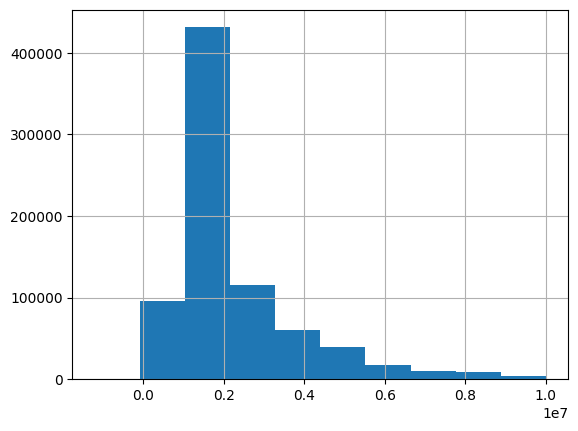

In [32]:
# salarios de candidatos
candidates[candidates["candidate_salary"]<10000000]["candidate_salary"].hist()

In [33]:
candidates=candidates[~candidates["full_text"].isna()]

In [34]:
candidates["len_text"]=candidates["full_text"].apply(lambda x: len(x.split(" ")))

<Axes: >

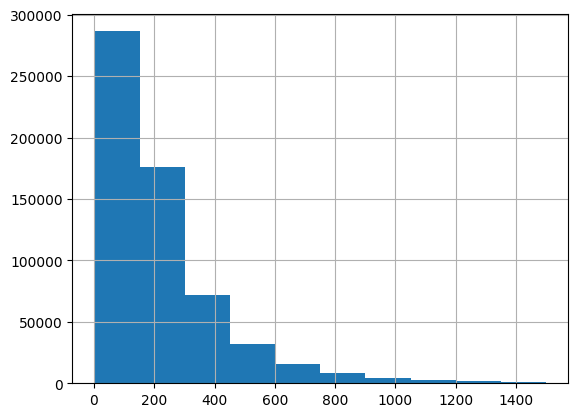

In [35]:
candidates[candidates["len_text"]< 1500]["len_text"].hist()

In [36]:
cities = pd.read_json("../files/raw/cities_col.json")
city_dict= cities[["id","location"]].set_index("id").to_dict()["location"]
candidates["city_loc"]=candidates["city_id"].map(city_dict)

In [37]:
len(candidates)

601798

In [38]:
candidates["candidate_id"].nunique()

601798

In [39]:
candidates["city_loc"]=candidates["city_loc"].fillna("")

In [40]:
candidates.reset_index(drop=True).to_json("../files/raw/candidates.json")
